In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import SR1

from unconstrained import SteepestDescent, ConjugateGradient, QuasiNewton, Newton

$$
\begin{align}
    \text{min} \quad (x_1 - 1)^2 + (x_2 - x_1 ^ 2)^2
\end{align}
$$

In [2]:
# Defining the objective function
def obj_fun(x):
    return (x[0] - 1) ** 2 + (x[1] - x[0] ** 2) ** 2

# Defining the gradient function
def gradient_fun(x):
    grad_x1 = 2 * (x[0] - 1) - 4 * x[0] * (x[1] - x[0] ** 2)
    grad_x2 = 2 * (x[1] - x[0] ** 2)
    return np.array([grad_x1, grad_x2])

# Defining the Hessian function
def hess_fun(x):
    h_11 = 2 + 12 * x[0] ** 2 - 4 * x[1]
    h_12 = -4 * x[0]
    h_21 = -4 * x[0]
    h_22 = 2
    H = np.array([[h_11, h_12], [h_21, h_22]])
    return H

In [3]:
# Creating a countouf plot
n_mesh = 500

x1 = np.linspace(2, 0, n_mesh)
x2 = np.linspace(2, 0, n_mesh)

X1, X2 = np.meshgrid(x1, x2)

X = np.vstack((X1.flatten().reshape([1, -1]), X2.flatten().reshape([1, -1])))
F = np.array([obj_fun(x) for x in X.T])

y = F.copy().reshape([n_mesh, n_mesh])

In [4]:
# To work in 3d visuals remove rashtag below
# %matplotlib qt

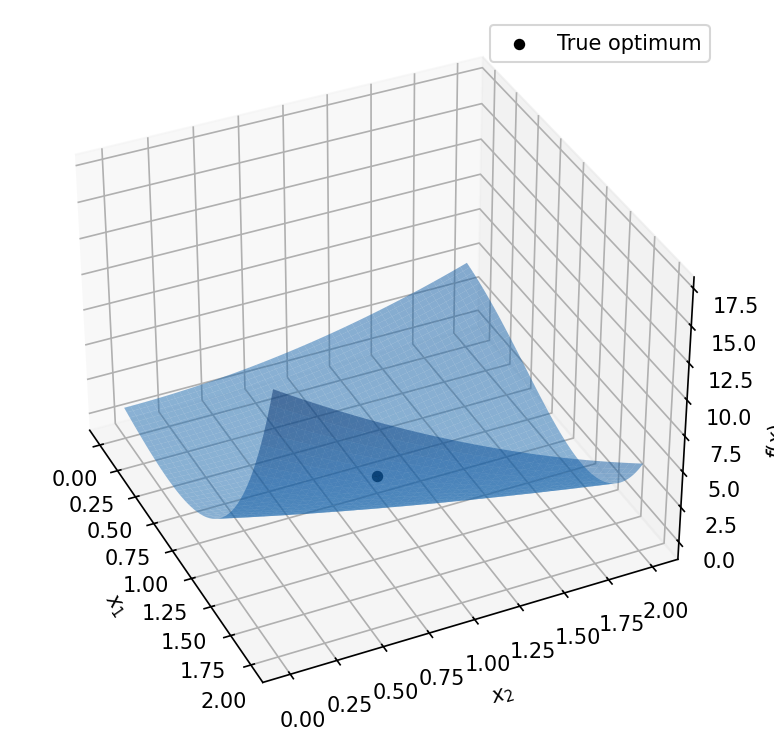

In [5]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=150, subplot_kw={"projection": "3d"})

ax.view_init(35, -25)

surf = ax.plot_surface(X1, X2, y, antialiased=True, cmap="Blues", alpha=0.5, vmin=-50, zorder=-1)

ax.scatter([1], [1], zs=0, marker="o", color="black", label="True optimum", zorder=1)
ax.legend()

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x)$")

plt.tight_layout()

plt.show()

In [6]:
# Shared initial estimation to all applied algorithms
x0 = np.array([0.75, 1.75])

In [7]:
steepest = SteepestDescent(obj_fun, gradient=gradient_fun, save_history=True)
steepest.optimize(x0)
print(steepest.result)

sd_x_hist = np.array([res["x"] for res in steepest.history])
sd_f_hist = np.array([res["f"] for res in steepest.history])

{'x': array([1.00511504, 1.0119954 ]), 'f': 2.918830445093451e-05, 'grad': array([0.00323785, 0.00347832]), 'iter': 51, 'message': 'Max iterations reached', 'success': False}


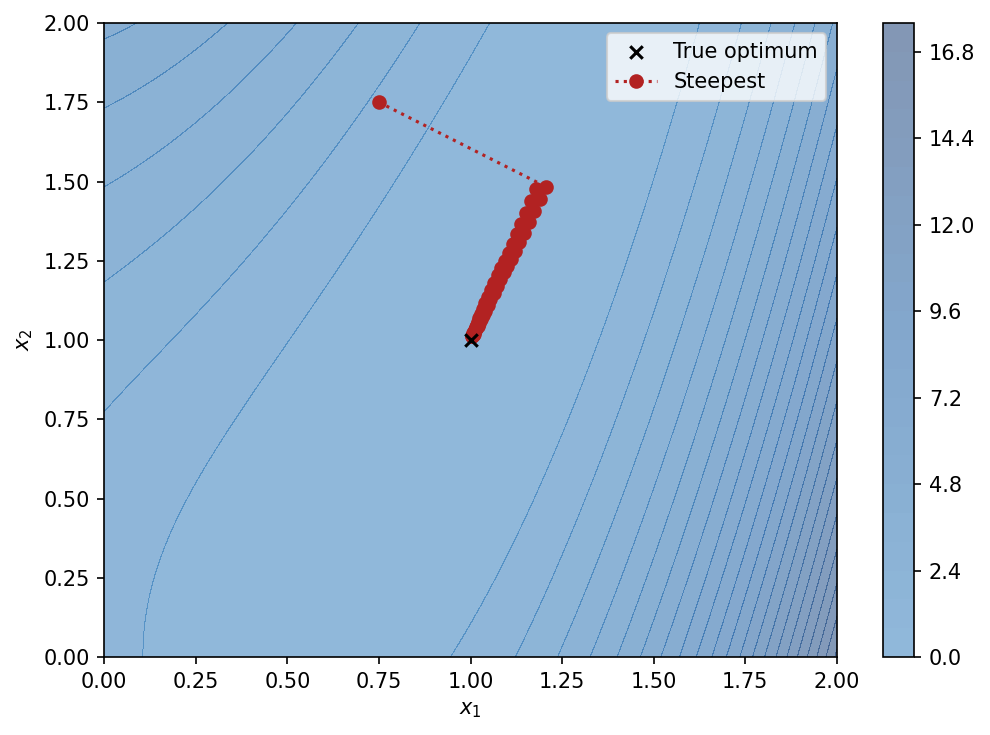

In [8]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=150)

surf = ax.contourf(X1, X2, y, antialiased=False, cmap="Blues", alpha=0.5, levels=25, vmin=-50)

ax.scatter([1], [1], marker="x", color="black", label="True optimum", zorder=10)

ax.plot(sd_x_hist[:, 0], sd_x_hist[:, 1], marker="o", linestyle=":",
        color="firebrick", label="Steepest")

ax.legend()

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

fig.colorbar(surf)

plt.tight_layout()

plt.show()

In [9]:
cg = ConjugateGradient(obj_fun, gradient=gradient_fun, save_history=True)
cg.optimize(x0)
print(cg.result)

cg_x_hist = np.array([res["x"] for res in cg.history])
cg_f_hist = np.array([res["f"] for res in cg.history])

{'x': array([1.00000008, 1.00000021]), 'f': 8.518206932097108e-15, 'grad': array([5.86860026e-09, 8.01945919e-08]), 'iter': 10, 'message': 'Tolerance reached', 'success': True}


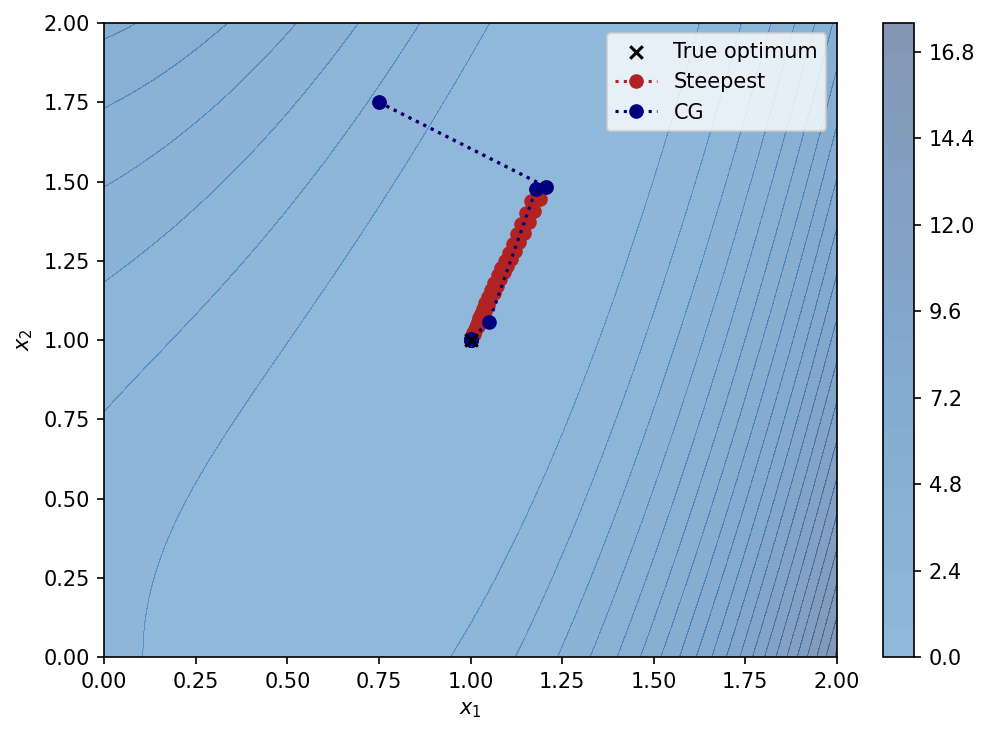

In [10]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=150)

surf = ax.contourf(X1, X2, y, antialiased=False, cmap="Blues", alpha=0.5, levels=25, vmin=-50)

ax.scatter([1], [1], marker="x", color="black", label="True optimum", zorder=10)

ax.plot(sd_x_hist[:, 0], sd_x_hist[:, 1], marker="o", linestyle=":",
        color="firebrick", label="Steepest")

ax.plot(cg_x_hist[:, 0], cg_x_hist[:, 1], marker="o", linestyle=":",
        color="navy", label="CG")

ax.legend()

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

fig.colorbar(surf)

plt.tight_layout()

plt.show()

In [11]:
newton = Newton(obj_fun, gradient=gradient_fun, hess=hess_fun, save_history=True)
newton.optimize(x0)
print(newton.result)

newton_x_hist = np.array([res["x"] for res in newton.history])
newton_f_hist = np.array([res["f"] for res in newton.history])

{'x': array([1., 1.]), 'f': 2.2149648496865076e-19, 'grad': array([-8.23940027e-10, -5.77766723e-11]), 'iter': 5, 'message': 'Negligible step', 'success': True}


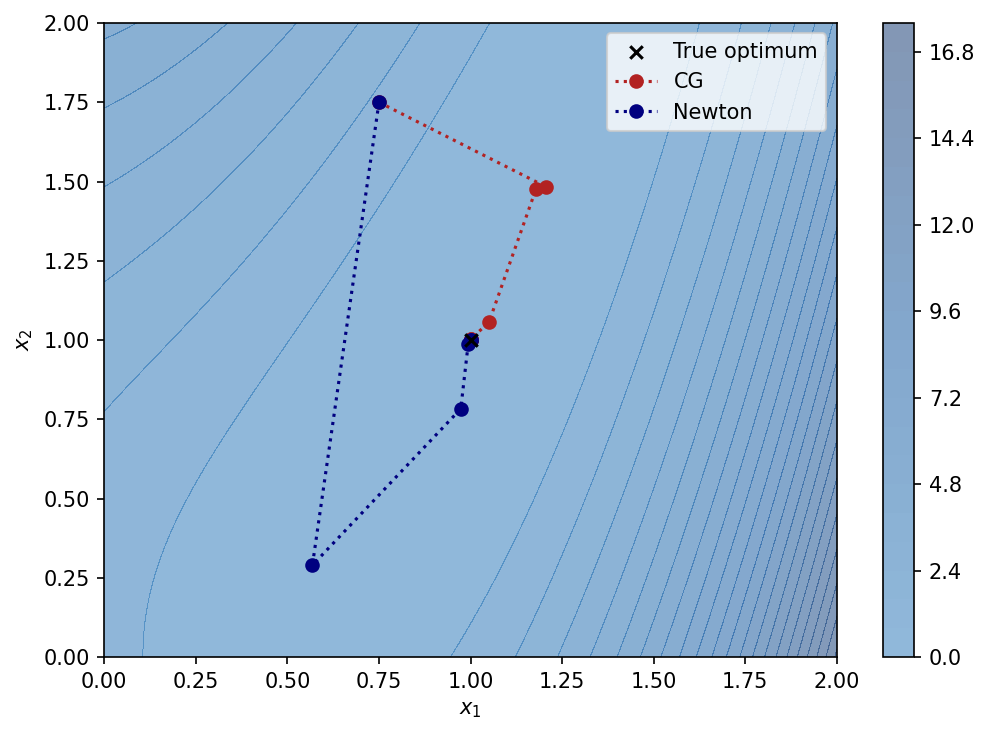

In [12]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=150)

surf = ax.contourf(X1, X2, y, antialiased=False, cmap="Blues", alpha=0.5, levels=25, vmin=-50)

ax.scatter([1], [1], marker="x", color="black", label="True optimum", zorder=10)

ax.plot(cg_x_hist[:, 0], cg_x_hist[:, 1], marker="o", linestyle=":",
        color="firebrick", label="CG")

ax.plot(newton_x_hist[:, 0], newton_x_hist[:, 1], marker="o", linestyle=":",
        color="navy", label="Newton")

ax.legend()

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

fig.colorbar(surf)

plt.tight_layout()

plt.show()

In [13]:
bfgs_high_c2 = QuasiNewton(obj_fun, gradient=gradient_fun, save_history=True)
bfgs_high_c2.optimize(x0)
print(bfgs_high_c2.result)

bfgs_x_hist_high = np.array([res["x"] for res in bfgs_high_c2.history])
bfgs_f_hist_high = np.array([res["f"] for res in bfgs_high_c2.history])

{'x': array([1., 1.]), 'f': 6.85204575156091e-17, 'grad': array([-3.58295066e-08,  1.61935825e-08]), 'iter': 12, 'message': 'Tolerance reached', 'success': True}


In [14]:
bfgs = QuasiNewton(obj_fun, gradient=gradient_fun, wolfe_c2=0.1, save_history=True)
bfgs.optimize(x0)
print(bfgs.result)

bfgs_x_hist = np.array([res["x"] for res in bfgs.history])
bfgs_f_hist = np.array([res["f"] for res in bfgs.history])

{'x': array([1., 1.]), 'f': 3.774573820799009e-18, 'grad': array([ 1.76042424e-09, -2.40584397e-09]), 'iter': 8, 'message': 'Tolerance reached', 'success': True}


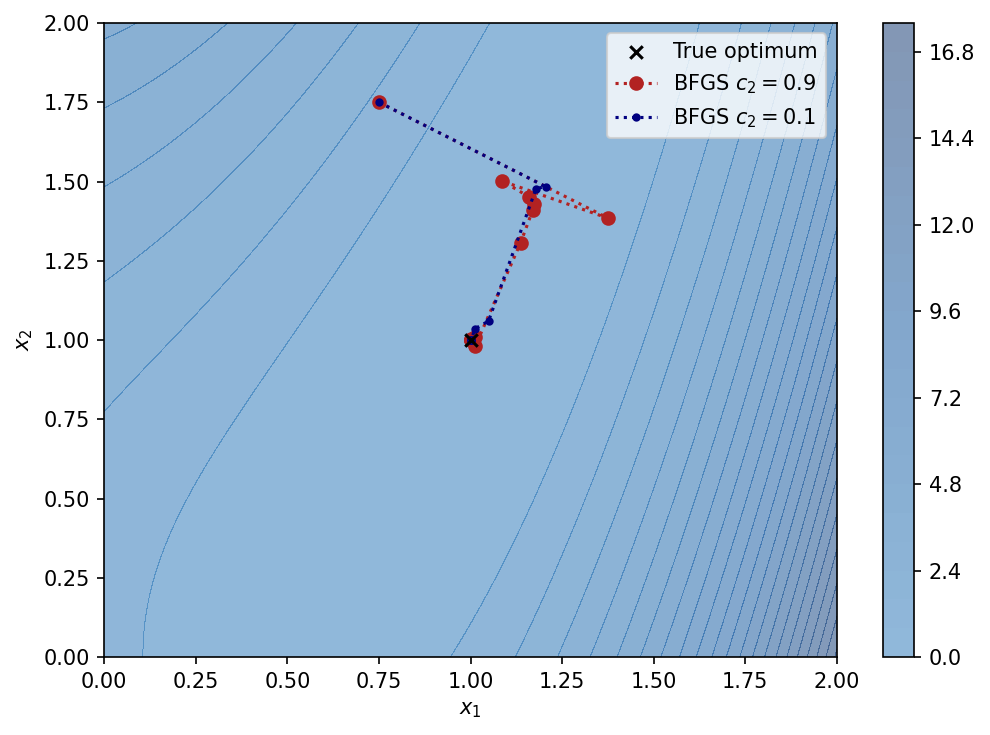

In [15]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=150)

surf = ax.contourf(X1, X2, y, antialiased=False, cmap="Blues", alpha=0.5, levels=25, vmin=-50)

ax.scatter([1], [1], marker="x", color="black", label="True optimum", zorder=10)

ax.plot(bfgs_x_hist_high[:, 0], bfgs_x_hist_high[:, 1], marker="o", linestyle=":",
        color="firebrick", label=r"BFGS $c_2 = 0.9$")

ax.plot(bfgs_x_hist[:, 0], bfgs_x_hist[:, 1], marker=".", linestyle=":",
        color="navy", label=r"BFGS $c_2 = 0.1$")

ax.legend()

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

fig.colorbar(surf)

plt.tight_layout()

plt.show()

In [16]:
sr1 = QuasiNewton(obj_fun, gradient=gradient_fun, hess=SR1(init_scale="auto"), save_history=True)
sr1.optimize(x0)
print(sr1.result)

{'x': array([1.37533751, 1.89155326]), 'f': 0.14087824442323396, 'grad': array([7.50675015e-01, 3.46389584e-14]), 'iter': 6, 'message': 'Tolerance reached', 'success': True}


c:\Users\Bruno\Desktop\Python Packages\optimization-demo-files\convex\venv\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


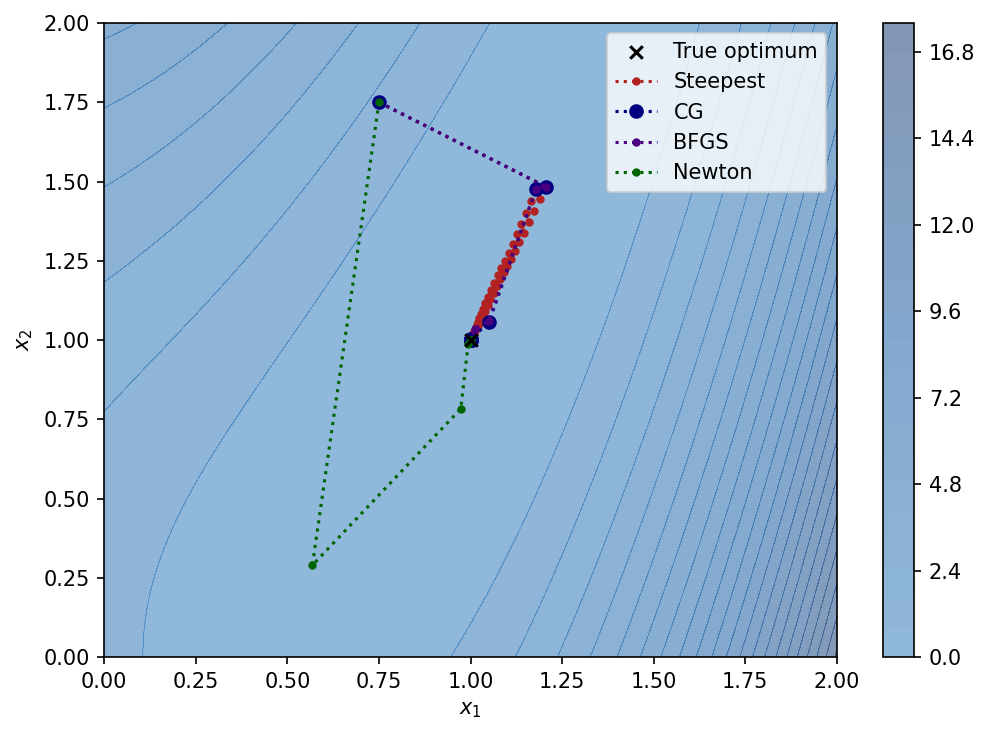

In [17]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=150)

surf = ax.contourf(X1, X2, y, antialiased=False, cmap="Blues", alpha=0.5, levels=25, vmin=-50)

ax.scatter([1], [1], marker="x", color="black", label="True optimum", zorder=10)

ax.plot(sd_x_hist[:, 0], sd_x_hist[:, 1], marker=".", linestyle=":",
        color="firebrick", label="Steepest")

ax.plot(cg_x_hist[:, 0], cg_x_hist[:, 1], marker="o", linestyle=":",
        color="navy", label="CG")

ax.plot(bfgs_x_hist[:, 0], bfgs_x_hist[:, 1], marker=".", linestyle=":",
        color="indigo", label="BFGS")

ax.plot(newton_x_hist[:, 0], newton_x_hist[:, 1], marker=".", linestyle=":",
        color="darkgreen", label="Newton")

ax.legend()

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

fig.colorbar(surf)

plt.tight_layout()

plt.show()